In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta
import numpy.random as random
from tqdm import tqdm
import seaborn as sns

sns.set()

%matplotlib inline

In [4]:
pi = [0.5, 0.5]
mu = 1

Y = [-1, 1]

xs = np.arange(-4, 4, step=0.05)
mc = 100

props = []
for i, x in enumerate(tqdm(xs)):
    class1_counts = 0
    pdf1 = norm.pdf(x, -1, 1)
    pdf2 = norm.pdf(x, 1, 1)
    
    for b in range(mc):
        label = np.random.choice(Y, 1, p = [pdf1, pdf2]/np.sum([pdf1, pdf2]))
        if label is -1:
            z = np.random.beta(4, 6)
        else:
            z = np.random.beta(6, 4)
            
        beta1 = beta.pdf(z, 4, 6)
        beta2 = beta.pdf(z, 6, 4)
            
        class1_counts += np.argmax(np.array([pdf1*beta1, pdf2*beta2]))
        
    props.append(class1_counts/mc)

100%|██████████| 160/160 [00:10<00:00, 15.40it/s]


In [6]:
mc1 = 100
props1 = []
for i, x in enumerate(tqdm(xs)):
    class1_counts = 0
    pdf1 = norm.pdf(x, -1, 1)
    pdf2 = norm.pdf(x, 1, 1)
    
    for b in range(mc):
        label = np.random.choice(Y, 1)
        if label is -1:
            z = np.random.normal(1,1)
        else:
            z = np.random.normal(1,1)
            
        beta1 = norm.pdf(z, 1, 1)
        beta2 = norm.pdf(z, 1, 1)
            
        class1_counts += np.argmax(np.array([pdf1*beta1, pdf2*beta2]))
        
    props1.append(class1_counts/mc)

100%|██████████| 160/160 [00:06<00:00, 24.92it/s]


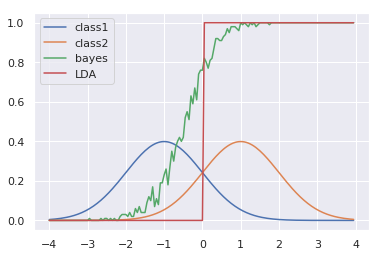

In [7]:
fig, ax = plt.subplots(1,1)
ax.plot(xs, norm.pdf(xs, -1, 1), label='class1')
ax.plot(xs, norm.pdf(xs, 1, 1), label='class2')
ax.plot(xs, props, label='bayes')
ax.plot(xs, props1, label='LDA')
ax.legend()
plt.savefig('fuzzy_classifier.png')